<a href="https://colab.research.google.com/github/chananchidacm-spec/Chananchida/blob/main/Miniproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving E-commerece sales data 2024.csv to E-commerece sales data 2024.csv


Saving E-commerece sales data 2024.csv to E-commerece sales data 2024.csv


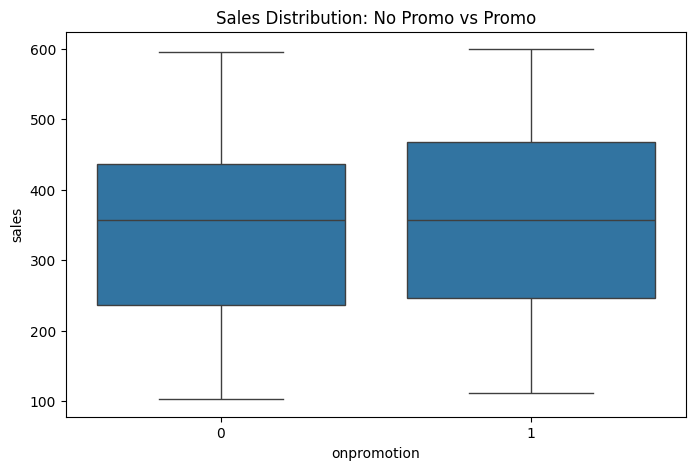

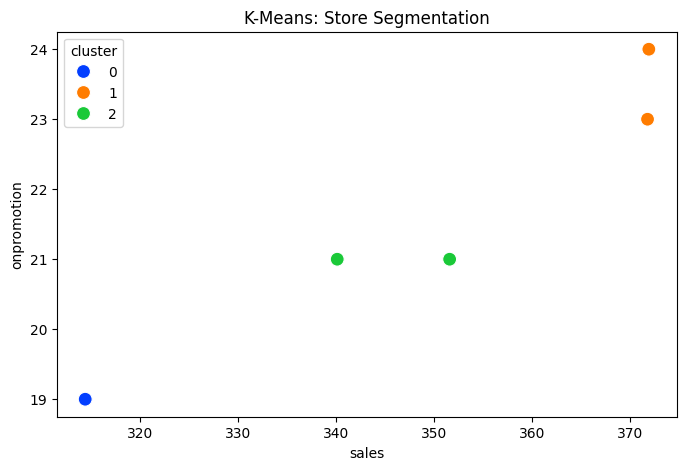

--- Model Results ---
Decision Tree RMSE: 159.67
Random Forest RMSE: 144.15


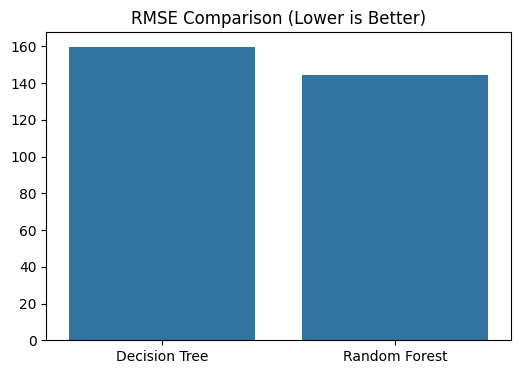

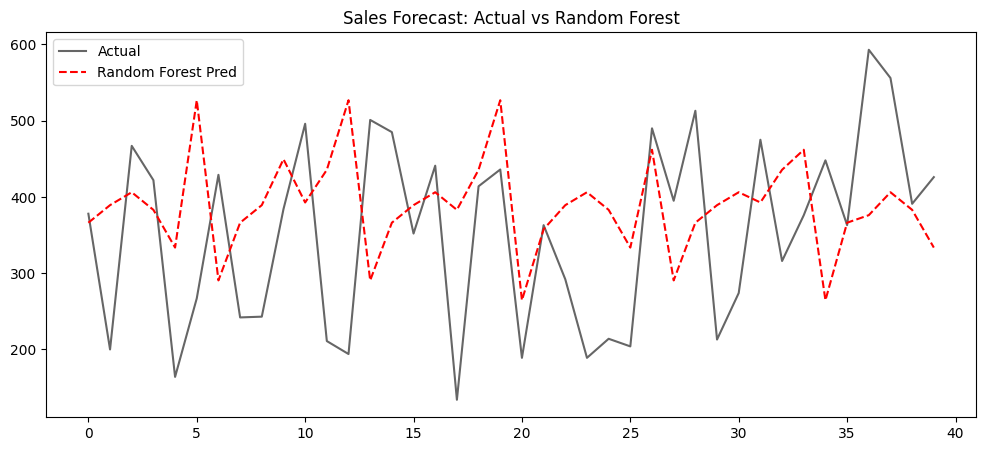

In [ ]:
# ==========================================
# Mini Project: Store Sales Forecasting
# Models: Decision Tree, Random Forest, K-Means
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from google.colab import files
uploaded = files.upload()

# --- 1. Dataset Description & Loading ---
# สำหรับงานจริง: df = pd.read_csv('your_file.csv')
# ตัวอย่างสร้างข้อมูลสมมติ (Simulation)
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=200)
data = {
    'date': dates,
    'store_id': np.random.randint(1, 6, 200),
    'onpromotion': np.random.randint(0, 2, 200),
    'sales': np.random.randint(100, 500, 200) + (np.random.randint(0, 2, 200) * 100) # ยอดขายจะเยอะขึ้นถ้ามีโปร
}
df = pd.DataFrame(data)

# --- 2. EDA & Preprocessing ---
# แปลงวันที่และสร้าง Feature ใหม่
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# แสดงความสัมพันธ์เบื้องต้น (EDA Graph)
plt.figure(figsize=(8, 5))
sns.boxplot(x='onpromotion', y='sales', data=df)
plt.title('Sales Distribution: No Promo vs Promo')
plt.show()


# --- 3. Unsupervised Learning (K-Means)   ---
# จัดกลุ่มร้านค้าตามยอดขายและโปรโมชั่น
store_stats = df.groupby('store_id').agg({'sales': 'mean', 'onpromotion': 'sum'}).reset_index()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(store_stats[['sales', 'onpromotion']])

kmeans = KMeans(n_clusters=3, random_state=42)
store_stats['cluster'] = kmeans.fit_predict(scaled_data)

plt.figure(figsize=(8, 5))
sns.scatterplot(data=store_stats, x='sales', y='onpromotion', hue='cluster', s=100, palette='bright')
plt.title('K-Means: Store Segmentation')
plt.show()


# --- 4. Supervised Learning (Train/Test Split) ---
features = ['onpromotion', 'month', 'day_of_week', 'is_weekend']
X = df[features]
y = df['sales']

# แบ่งข้อมูลแบบ Time-Series (80% เทรน, 20% ทดสอบ)
split = int(len(df) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# --- 5. Modeling (Decision Tree & Random Forest) ---
# Model 1: Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

# Model 2: Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# --- 6. Evaluation (RMSE) & Comparison ---
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_pred))
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

print(f"--- Model Results ---")
print(f"Decision Tree RMSE: {dt_rmse:.2f}")
print(f"Random Forest RMSE: {rf_rmse:.2f}")

# กราฟเปรียบเทียบ RMSE
plt.figure(figsize=(6, 4))
sns.barplot(x=['Decision Tree', 'Random Forest'], y=[dt_rmse, rf_rmse])
plt.title('RMSE Comparison (Lower is Better)')
plt.show()


# --- 7. Interpretation (Actual vs Predicted) ---
plt.figure(figsize=(12, 5))
plt.plot(y_test.values, label='Actual', color='black', alpha=0.6)
plt.plot(rf_pred, label='Random Forest Pred', color='red', linestyle='--')
plt.title('Sales Forecast: Actual vs Random Forest')
plt.legend()
plt.show()